# CONTENT-BASED RECOMMENDATION USING COSINE SIMILARITY

In [ ]:
## importing the libraries
import pandas as pd
import numpy as np
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
new_df = pd.read_csv("/content/new_df.csv")  ## reading the preprocessed dataset from "content_preprocessing.ipynb"

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity  ## importing the cosine similarity

In [ ]:
## class to implement CountVectorizer from scratch
class CountVectorizer_Scratch:
    def __init__(self, max_features=None):
        self.max_features = max_features
        self.vocab = {}
        self.vocabulary_ = {}

    def fit_transform(self, documents):
        self.create_vocabulary(documents)
        return self.transform(documents)

    def create_vocabulary(self, documents):
        word_count = {}
        for document in documents:
            for word in document.split():
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
        sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
        if self.max_features is not None:
            sorted_words = sorted_words[:self.max_features]
        self.vocabulary_ = {word[0]: index for index, word in enumerate(sorted_words)}

    def transform(self, documents):
        document_vectors = []
        for document in documents:
            vector = [0] * len(self.vocabulary_)
            for word in document.split():
                if word in self.vocabulary_:
                    vector[self.vocabulary_[word]] += 1
            document_vectors.append(vector)
        return np.array(document_vectors)

In [ ]:
## class to implement the TFIDF-Vectorizer from scratch
class TfidfVectorizer_Scratch(CountVectorizer_Scratch):
    def __init__(self, max_features=None, stop_words=None):
        super().__init__(max_features, stop_words)

    def fit_transform(self, documents):
        count_matrix = super().fit_transform(documents)
        tf_matrix = self.calculate_tf(count_matrix)
        idf_vector = self.calculate_idf(count_matrix)
        return self.calculate_tfidf(tf_matrix, idf_vector)

    def calculate_tf(self, count_matrix):
        tf_matrix = []
        for row in count_matrix:
            total_words = sum(row)
            tf_vector = [count / total_words for count in row]
            tf_matrix.append(tf_vector)
        return tf_matrix

    def calculate_idf(self, count_matrix):
        idf_vector = []
        total_documents = len(count_matrix)
        for j in range(len(count_matrix[0])):
            num_docs_containing_word = sum([1 for row in count_matrix if row[j] > 0])
            idf = math.log(total_documents / (1 + num_docs_containing_word))
            idf_vector.append(idf)
        return idf_vector

    def calculate_tfidf(self, tf_matrix, idf_vector):
        tfidf_matrix = []
        for tf_vector in tf_matrix:
            tfidf_vector = [tf * idf for tf, idf in zip(tf_vector, idf_vector)]
            tfidf_matrix.append(tfidf_vector)
        return tfidf_matrix

# COSINE SIMILARITY :

### Cosine similarity is a measure used to determine how similar two vectors are in a multi-dimensional space. It calculates the cosine of the angle between the vectors, where a value of 1 indicates perfect similarity, 0 indicates no similarity, and -1 indicates perfect dissimilarity. It's widely used in information retrieval, recommendation systems, and natural language processing.


### Cosine similarity computes the cosine of the angle between two vectors in a multi-dimensional space. For vectors aa and bb, it is calculated as:
### cosine_similarity(a,b)=a⋅b∥a∥⋅∥b∥cosine_similarity(a,b)=∥a∥⋅∥b∥a⋅b​
### where a⋅ba⋅b is the dot product of aa and bb, and ∥a∥∥a∥ and ∥b∥∥b∥ are the magnitudes (or norms) of the vectors aa and bb respectively.

In [ ]:
## function to calculate the cosine similarity from scratch
def cosine_similarity_matrix(vectors):
    num_vectors = len(vectors)
    similarity_matrix = np.zeros((num_vectors, num_vectors))
    for i in range(num_vectors):
        for j in range(num_vectors):
            similarity_matrix[i][j] = cosine_similarity_scratch(vectors[i], vectors[j])
    return similarity_matrix

def cosine_similarity_scratch(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = math.sqrt(np.sum(np.square(vector1)))
    magnitude2 = math.sqrt(np.sum(np.square(vector2)))

    if magnitude1 == 0 or magnitude2 == 0:
        return 0

    return dot_product / (magnitude1 * magnitude2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
## initializing the vectorizers object
cv = CountVectorizer_Scratch(max_features=5000)
tfid = TfidfVectorizer(max_features=1000)

In [ ]:
vector = cv.fit_transform(new_df['transformed_text'])

In [ ]:
vector1 = tfid.fit_transform(new_df['transformed_text'])

In [ ]:
vector.shape

(9742, 5000)

In [ ]:
## calculating and printing the similarity score
similarity = cosine_similarity(vector)
print(similarity)

[[1.         0.63245553 0.28867513 ... 0.         0.13363062 0.11785113]
 [0.63245553 1.         0.18257419 ... 0.         0.         0.        ]
 [0.28867513 0.18257419 1.         ... 0.         0.         0.13608276]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.13363062 0.         0.         ... 0.         1.         0.        ]
 [0.11785113 0.         0.13608276 ... 0.         0.         1.        ]]


In [ ]:
similarity.shape  ## similarity array will of shape "movies.shape x movies.shape"

(9742, 9742)

In [ ]:
map1 = similarity[0 : 6, 0:6]

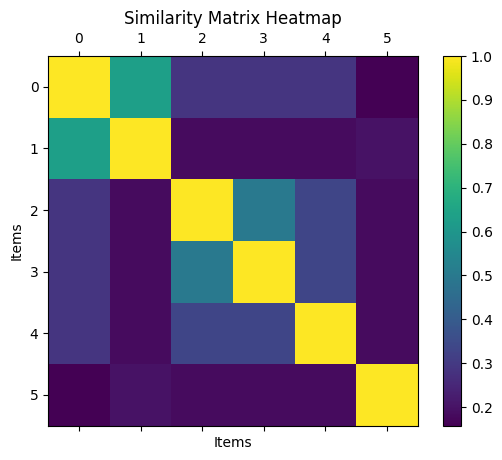

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_similarity_matrix(similarity_matrix, labels=None):
    """
    Plot a heatmap for a similarity matrix
    """
    fig, ax = plt.subplots()
    cax = ax.matshow(similarity_matrix, cmap='viridis')

    if labels:
        ax.set_xticks(np.arange(len(labels)))
        ax.set_yticks(np.arange(len(labels)))
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)

    plt.xlabel('Movies')
    plt.ylabel('Movies')
    plt.title('Similarity Matrix Heatmap')
    plt.colorbar(cax)
    plt.show()

# plot the similarity matrix
plot_similarity_matrix(map1)

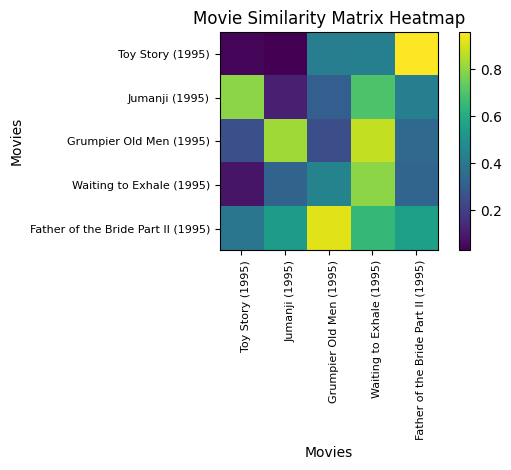

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_similarity_matrix(similarity_matrix, movie_names):
    """
    Plot a heatmap for a similarity matrix with movie names
    """
    fig, ax = plt.subplots()
    cax = ax.matshow(similarity_matrix, cmap='viridis')

    ax.set_xticks(np.arange(len(movie_names)))
    ax.set_yticks(np.arange(len(movie_names)))
    ax.set_xticklabels(movie_names, rotation=90, ha='left', fontsize=8)
    ax.set_yticklabels(movie_names, fontsize=8)

    ax.xaxis.set_ticks_position('bottom')

    plt.xlabel('Movies')
    plt.ylabel('Movies')
    plt.title('Movie Similarity Matrix Heatmap')
    plt.colorbar(cax)

    plt.tight_layout()
    plt.show()

movies_df = pd.read_csv('movies.csv')

num_movies = 5
similarity_matrix = np.random.rand(num_movies, num_movies)

# plotting the similarity matrix with movie names
plot_similarity_matrix(similarity_matrix, movies_df['title'].iloc[0:num_movies])

In [ ]:
similarity1 = cosine_similarity(vector1)

In [ ]:
print(similarity1)

[[1.         0.56796632 0.16905847 ... 0.         0.07449185 0.0299756 ]
 [0.56796632 1.         0.25259204 ... 0.         0.         0.        ]
 [0.16905847 0.25259204 1.         ... 0.         0.         0.03507627]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.07449185 0.         0.         ... 0.         1.         0.        ]
 [0.0299756  0.         0.03507627 ... 0.         0.         1.        ]]


In [ ]:
## function to recommend the movies using "CountVectorizer"
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [ ]:
recommend("Toy Story (1995)")

Toy Story 2 (1999)
Toy Story 3 (2010)
Moana (2016)
Antz (1998)
Valiant (2005)


In [ ]:
## function to recommend the movies using "CountVectorizer"
lst = []
def recommend1(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity1[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        lst.append(new_df.iloc[i[0]].title)
    return lst

In [ ]:
recommended_lst = recommend1("Toy Story (1995)")

In [ ]:
recommended_lst

['Toy Story 2 (1999)',
 'Toy Story 3 (2010)',
 'Toys (1992)',
 'Balto (1995)',
 'Jumanji (1995)']

In [ ]:
len(recommended_lst)

5

In [ ]:
movie = "Toy Story (1995)"
index = new_df[new_df['title'] == movie].index[0]
sim_array = similarity1[index]
sorted_indices = np.argsort(sim_array)[::-1][:6]

In [ ]:
## evaluation of genres

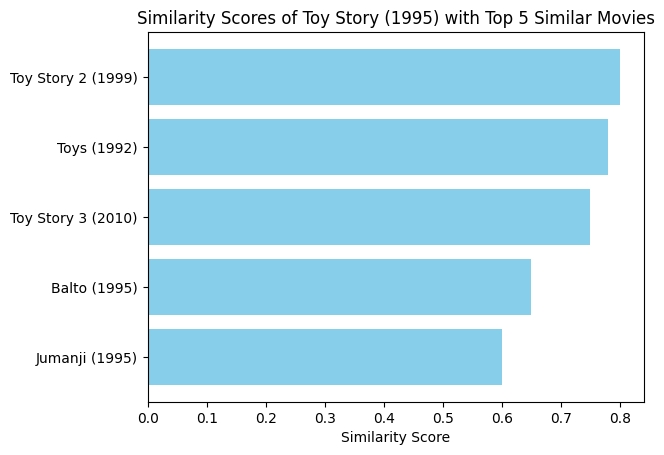

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_similarity_scores(movie_name, similar_movies, similarity_scores):
    """
    Plot the similarity scores of a movie with its top similar movies.
    """
    fig, ax = plt.subplots()
    ax.barh(np.arange(len(similar_movies)), similarity_scores, align='center', color='skyblue')
    ax.set_yticks(np.arange(len(similar_movies)))
    ax.set_yticklabels(similar_movies)
    ax.invert_yaxis()
    ax.set_xlabel('Similarity Score')
    ax.set_title(f'Similarity Scores of {movie_name} with Top {len(similar_movies)} Similar Movies')
    plt.show()

movies_df = pd.read_csv('movies.csv')

# suppose we have similarity scores for a specific movie
movie_name = "Toy Story (1995)"


recommended_lst = ['Toy Story 2 (1999)',
 'Toy Story 3 (2010)',
 'Toys (1992)',
 'Balto (1995)',
 'Jumanji (1995)']
sim_array = [0.8, 0.75, 0.78, 0.65, 0.6]

# sort the similarity scores and similar movies to get the top six values
sorted_indices = np.argsort(sim_array)[::-1][:6]
recommended_lst_sorted = [recommended_lst[i] for i in sorted_indices]
sim_array_sorted = [sim_array[i] for i in sorted_indices]

# plot the similarity scores
plot_similarity_scores(movie_name, recommended_lst_sorted, sim_array_sorted)


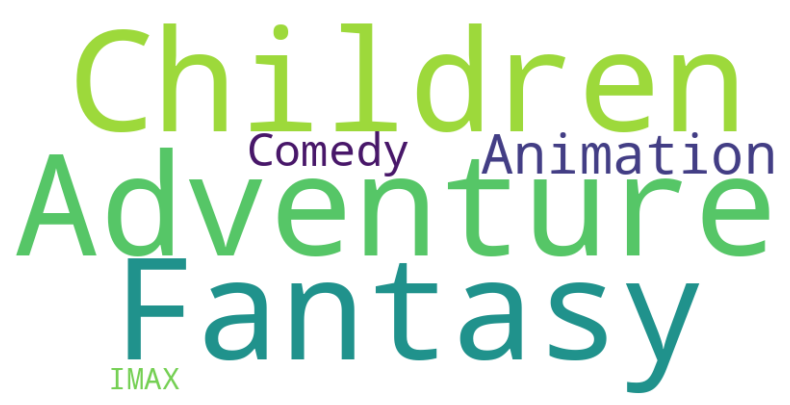

In [ ]:
## plotting the genres wordcloud for the recommended movies
movies = pd.read_csv("movies.csv")
recommendations = recommended_lst

# filtering movies based on recommendations
recommended_movies = movies[movies['title'].isin(recommendations)]
# concatenate all genres into a single string
genres_text = ' '.join(recommended_movies['genres'])

# generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(genres_text)

# display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
